In [24]:
import sys
!{sys.executable} -m pip install -v cmocean cartopy 

 

Using pip 22.0.4 from /Users/aashishpanta/opt/anaconda3/lib/python3.8/site-packages/pip (python 3.8)


In [25]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from OpenVisus import *
from backend_v2 import *
# import cmocean  # for perceptually uniform colormaps
# import cartopy as cr # for geographic mapping
# import cartopy.crs as ccrs # for map projections
# import matplotlib.pyplot as plt # plotting tool
# import cartopy.feature as cfeature # to add coastlines, land and ocean
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [26]:
ds = xr.open_dataset('20190426120000-REMSS-L4_GHRSST-SSTfnd-MW_OI-GLOB-v02.0-fv05.0.nc')
ds

<xarray.Dataset>
Dimensions:           (lat: 720, lon: 1440, time: 1)
Coordinates:
  * lat               (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon               (lon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time              (time) datetime64[ns] 2019-04-26T12:00:00
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.6,ACDD-1.3
    title:                      Analysed foundation sea surface temperature o...
    summary:                    A merged, multi-sensor L4 foundation SST prod...
    references:                 http://www.remss.com/measurements/sea-surface...
    institution:                REMSS
    history:                    2019-05-30 18:27:13-0700 created by fuse_sens...
    ...                         ...
    project:                    Group for High Resolution Sea Surface Tempera...
    publisher_name:             The GHRSST Project Office
    publisher_email:            ghrsst-po@nceo.ac.uk
    publisher_url:              http://www.ghrsst.org
    processing_level:           L4
    cdm_data_type:              grid

In [27]:
ds

<xarray.Dataset>
Dimensions:           (lat: 720, lon: 1440, time: 1)
Coordinates:
  * lat               (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon               (lon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * time              (time) datetime64[ns] 2019-04-26T12:00:00
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.6,ACDD-1.3
    title:                      Analysed foundation sea surface temperature o...
    summary:                    A merged, multi-sensor L4 foundation SST prod...
    references:                 http://www.remss.com/measurements/sea-surface...
    institution:                REMSS
    history:                    2019-05-30 18:27:13-0700 created by fuse_sens...
    ...                         ...
    project:                    Group for High Resolution Sea Surface Tempera...
    publisher_name:             The GHRSST Project Office
    publisher_email:            ghrsst-po@nceo.ac.uk
    publisher_url:              http://www.ghrsst.org
    processing_level:           L4
    cdm_data_type:              grid

In [28]:
ds.analysed_sst.lat

<xarray.DataArray 'lat' (lat: 720)>
array([-89.875, -89.625, -89.375, ...,  89.375,  89.625,  89.875],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
Attributes:
    units:          degrees_north
    standard_name:  latitude
    axis:           Y
    valid_min:      -90.0
    valid_max:      90.0
    comment:        geographical coordinates, WGS84 datum

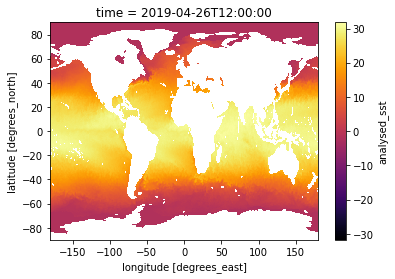

In [31]:
(ds.analysed_sst-273.15).plot(cmap='inferno')

In [32]:
ds_sst = ds.analysed_sst - 273.15
ds_sst.lon

<xarray.DataArray 'lon' (lon: 1440)>
array([-179.875, -179.625, -179.375, ...,  179.375,  179.625,  179.875],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Attributes:
    units:          degrees_east
    standard_name:  longitude
    axis:           X
    valid_min:      -180.0
    valid_max:      180.0
    comment:        geographical coordinates, WGS84 datum

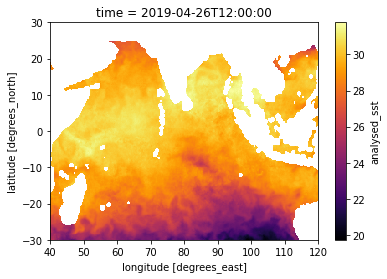

In [33]:
ds_sst.sel(lon=slice(40,120),lat=slice(-30,30)).plot(cmap='inferno')